In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [8]:
# Create a DataFrame (table) with feature names
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target (house prices) into the table
df['PRICE'] = housing.target

# View first 5 rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [10]:
print(df.isnull().sum())

# Basic description of data
print(df.describe())

# Shape of data (rows, columns)
print(df.shape)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

In [7]:
#Fetching the dataset using pandas

dataset = pd.read_csv("Housing.csv")

In [4]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# checking the number of rows and columns in the dataset

dataset.shape

(545, 13)

In [6]:
#check for missing values

dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#stastical measures of dataset

dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
#converting objects into numeric values

le = LabelEncoder()
col_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

#Applying labelcoder to each categorical column

for col in col_list:
    dataset[col] = le.fit_transform(dataset[col])

In [9]:
# # understanding the correlation between various features in the dataset

new_dataset = dataset.select_dtypes(include = ['number'])
correlation = new_dataset.corr()

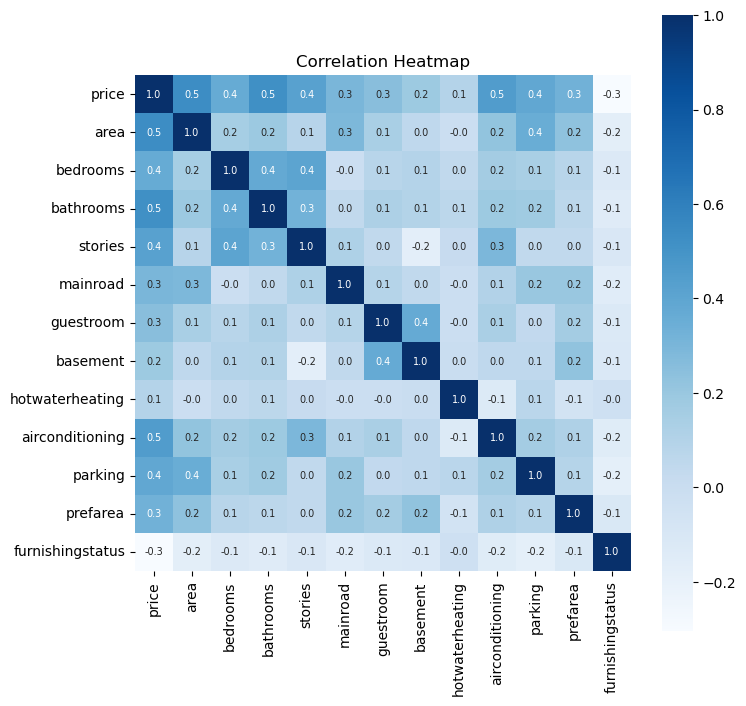

In [10]:
# constructing heatmap

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 7}, cmap = 'Blues')
plt.title("Correlation Heatmap")
# plt.xlabel('Feature Name', fontsize=12)
# plt.ylabel('Feature Name', fontsize=12)
# plt.tight_layout()
plt.show()

In [11]:
#splitting the data and target

X = dataset.drop(columns =['price'])
Y = dataset['price']

In [52]:
# splitting test and train data

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.dtypes)

area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object


In [53]:
#loading the model - XGBoost Regressor, LinearRegression

# model = XGBRegressor()
model = LinearRegression()

In [54]:
#training the model

model.fit(X_train,y_train)

LinearRegression()

In [55]:
#prediction

prediction = model.predict(X_test)
# print(prediction)
# df = pd.DataFrame(prediction, columns = ['Predicted Prices'])
# df

In [56]:
# Exporting data to csv

comparison_df = pd.DataFrame({
    "Actual Price" : y_test.values,
    "Predicted Price" : prediction
})
comparison_df.to_csv("Price prediction compariosn.csv", index = False)

In [57]:
# R squared error

score1 = metrics.r2_score(y_test, prediction)
score2 = metrics.mean_absolute_error(y_test, prediction)

print("R sqaured error: ", score1)
print("Mean absolute error: ", score2)

R sqaured error:  0.6898994357489279
Mean absolute error:  741248.2580160635


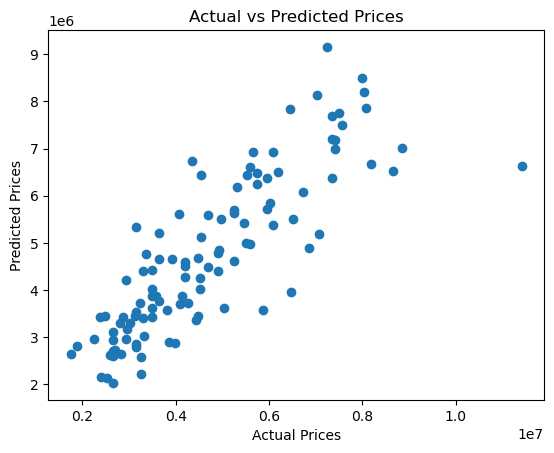

In [58]:
plt.scatter(y_test,prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [59]:
import joblib

joblib.dump(model,'price_predictor.joblib')

['price_predictor.joblib']